In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

# parallelization
# from pyqula import parallel ; parallel.set_cores("max") # uncomment to use all the cores

import numpy as np

# Topological states of matter in 2D materials
In this session we will address several examples of topological states of matter, including Quantum Hall insulators and quantum spin Hall insulators

### Contents
- The quantum Hall effects and its Landau levels
- Chern insulators and edge states
- Bulk topological invarians and Chern number
- Quantum Valley Hall insulators

### Learning outcomes
- Identify chiral edge states in electronic structures and its topological origin
- Rationalize topological states in terms of bulk invariants
- Understand the emergence of electrically tunable topological in van der Waals multilayers

## The quantum Hall effect in graphene
We will start showing the emergence of edge states for a 2d electron gas with a magnetic field

(-1.0, 1.0)

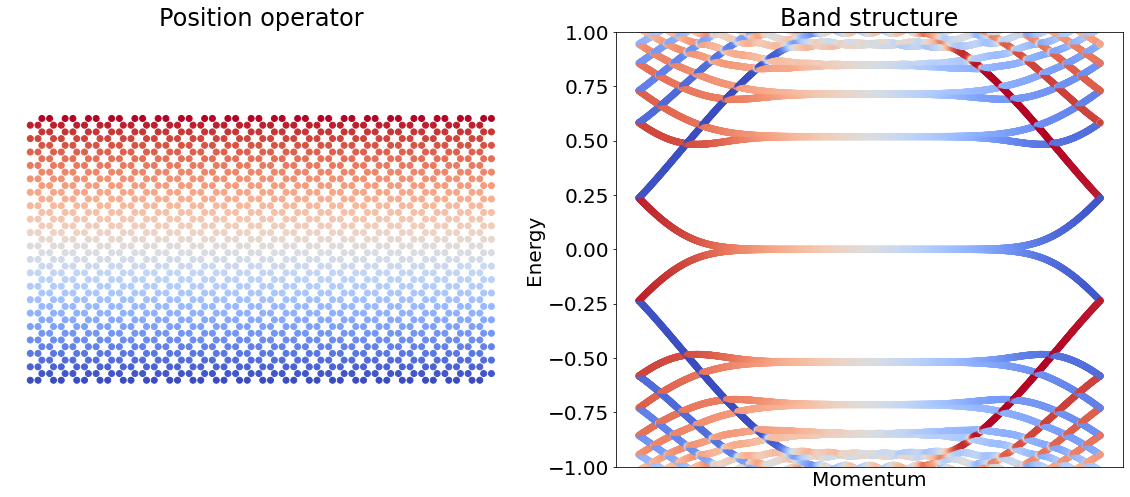

In [18]:
from pyqula import geometry
g = geometry.honeycomb_armchair_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_orbital_magnetic_field(0.01) # add an out-of plane magnetic field

# draw a ribbon with the position operator
gs = g.get_supercell(20) 
plt.subplot(1,2,1) ; plt.title("Position operator")
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,1]) ; plt.axis("equal") ; plt.axis("off")

# plot the bands
plt.subplot(1,2,2) ; plt.title("Band structure")
(k,e,c) = h.get_bands(kpath=["X","G","X"],operator=Opy) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])# plot

### Exercise
- Remove the magnetic field, do you still see states localized at the edges?
- Replace the honeycomb ribbon by a zigzag ribbon (honeycomb_zizgag_ribbon). How does the spectra look like?
- Make the ribbon wider, which change do you see in the band structure?
- Replace the honeycomb lattice by a square lattice. Do you observe Landau levels?

## Localization of the edge states in the quantum Hall effect
Let us now look at where the states are localized as function of energy

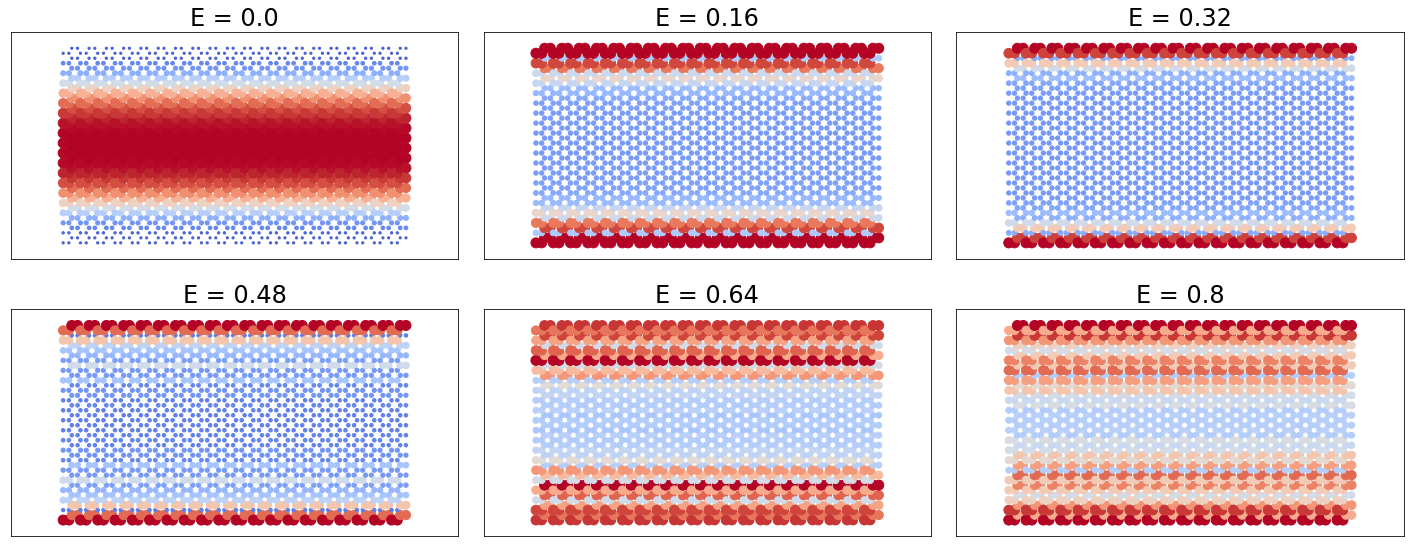

In [3]:
N = 6 # number of plots
ws = np.linspace(0.,0.8,N) # energies

g = geometry.honeycomb_armchair_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_orbital_magnetic_field(0.01) # add an out-of plane magnetic field

ii = 1 # counter for the subplots
for w in ws:
    plt.subplot(N//3,3,ii); ii += 1 
    (x,y,d) = h.get_ldos(e=w,nrep=20,delta=1e-2,nk=20) # compute local density of states
    plt.title("E = "+str(np.round(w,2))) # set the title
    plt.scatter(x,y,c=d,s=d/np.max(d)*100,vmin=0.) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")# plot
plt.tight_layout() # adjust the subplots

### Exercise
- Recompute the previous local density of states, but now with a smaller magnetic field. What happens to the edge states?
- Recompute the previous local density of states, but now with a narrower ribbon. What happens to the edge states?

## The quantum anomalous Hall effect
Before we considered a system with a magnetic field that has topological edge states. We will now see that topological edge states can appear in the absence of an external magnetic field

(-1.0, 1.0)

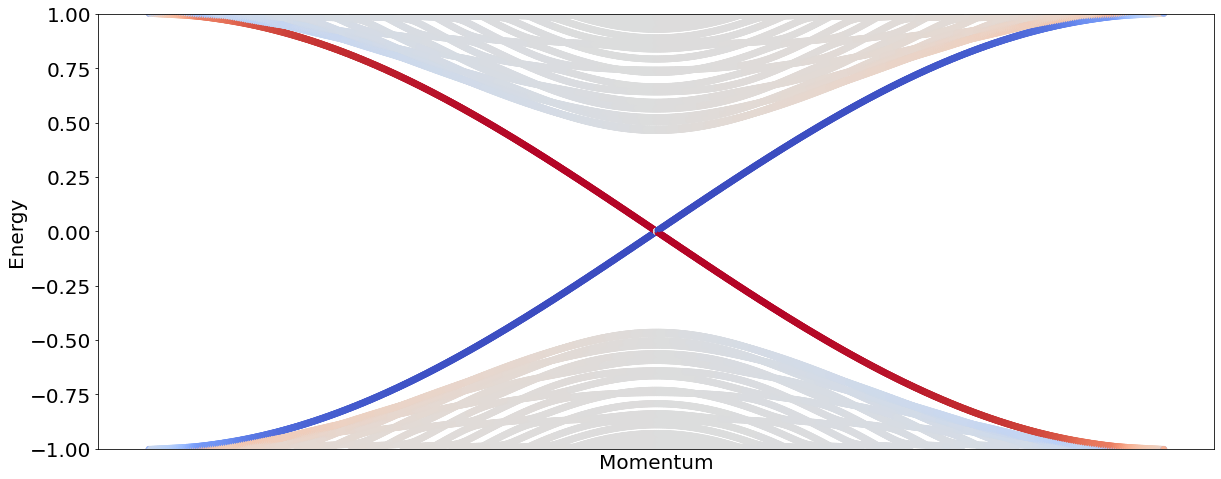

In [4]:
from pyqula import geometry
g = geometry.honeycomb_armchair_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_haldane(0.1) # add Haldane coupling (second neighbor imaginary hopping)
(k,e,c) = h.get_bands(kpath=["X","G","X"],operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])# plot

### Exercise
- Make the ribbon narrower. What happens to the edge states, and why?
- Replace the honeycomb ribbon by a zigzag ribbon (honeycomb_zizgag_ribbon). How does the spectra look like?


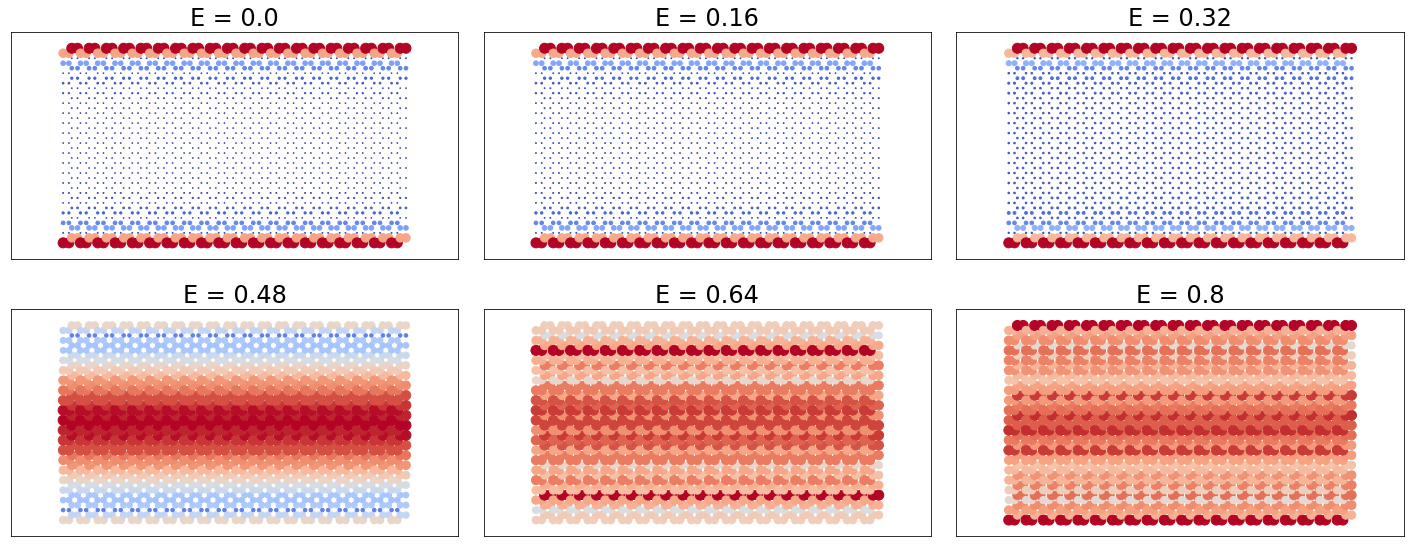

In [5]:
N = 6 # number of plots
ws = np.linspace(0.,0.8,N) # energies

g = geometry.honeycomb_armchair_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_haldane(0.1) # add Haldane coupling (seocnd neighbor imaginary hopping)

ii = 1 # counter for the subplots
for w in ws:
    plt.subplot(N//3,3,ii); ii += 1 
    (x,y,d) = h.get_ldos(e=w,nrep=20,delta=1e-2,nk=20) # compute local density of states
    plt.title("E = "+str(np.round(w,2))) # set the title
    plt.scatter(x,y,c=d,s=d/np.max(d)*100,vmin=0.) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")# plot
plt.tight_layout() # adjust the subplots

## Topological edge states in irregular geometries
Before we were considering systems that have translational symmetry in the x direction, showing that topological edge states appear. We will now focus on 0d systems with complex boundaries, showing that those same edge states survive

(-12.384163274117478,
 12.384163274117482,
 -14.300000000000008,
 14.299999999999986)

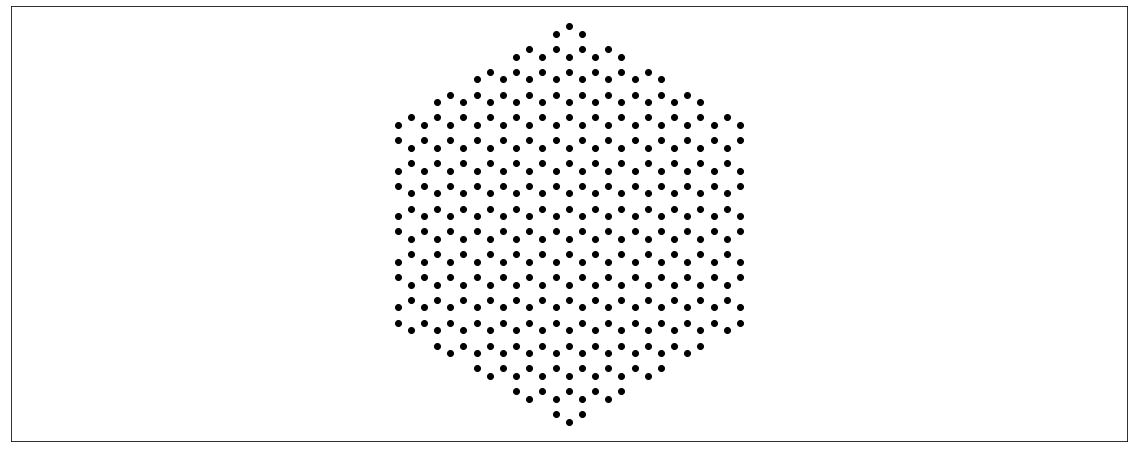

In [6]:
# let us first show a few different islands. 
# For that, we will use a special library that allows to generate geometries of islands systematically
from pyqula import islands
g = islands.get_geometry(name="honeycomb",n=8,nedges=6,rot=np.pi/6.) # get an armchair island, n controls the size
plt.scatter(g.r[:,0],g.r[:,1],c="black") ;  plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal") # plot

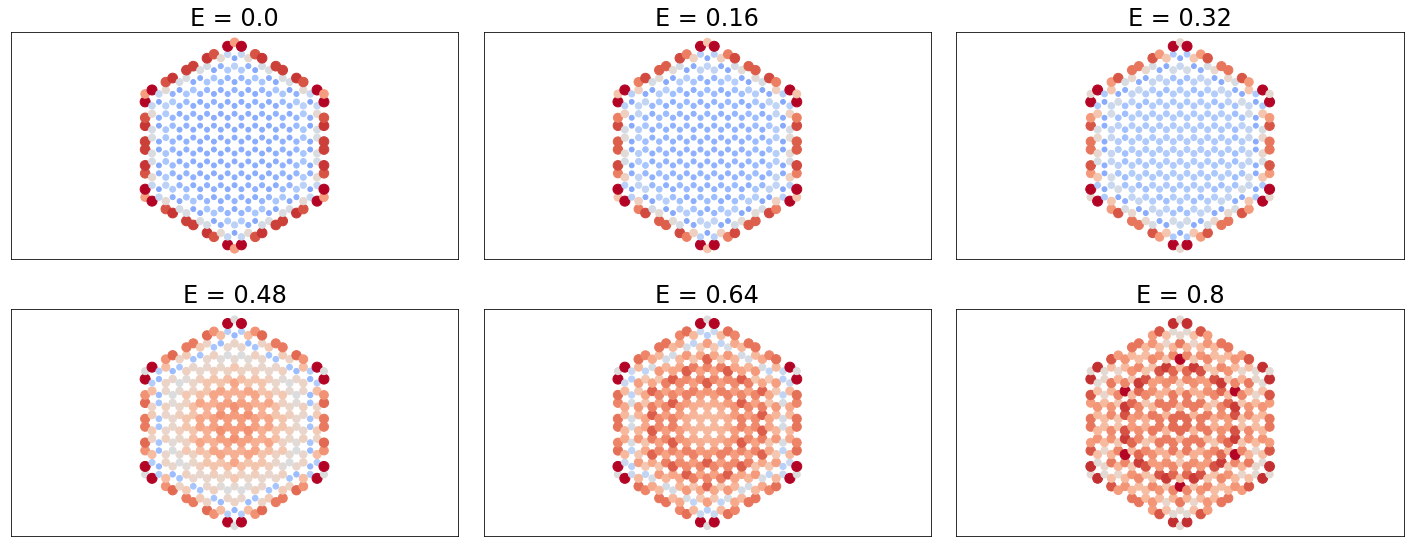

In [7]:
# let us now compute the local density of states in the presence of Haldane coupling
g = islands.get_geometry(name="honeycomb",n=8,nedges=6,rot=np.pi/6.) # get an armchair island
h = g.get_hamiltonian(tij=[1.,0.3]) # generate the Hamiltonian, now also with 2nd neighbor hopping
h.set_filling(0.5) # put at half filling
h.add_haldane(0.1) # add Haldane coupling (seocnd neighbor imaginary hopping)

ii = 1 # counter for the subplots
for w in ws:
    plt.subplot(N//3,3,ii); ii += 1 
    (x,y,d) = h.get_ldos(e=w,nrep=20,delta=1e-1) # compute local density of states
    plt.title("E = "+str(np.round(w,2))) # set the title
    plt.scatter(x,y,c=d,s=d/np.max(d)*100,vmin=0.) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")# plot
plt.tight_layout() # adjust the subplots

### Exercise
- Make the island smaller.What happens to the edge states?
- Decrease the value of the Haldane coupling. What happens to the edge states?

## Topological states and topological invariants
So far we have focused on the mergence of edge states. Let us now address the topological reason for the emergence of edge modes: the Berry curvature

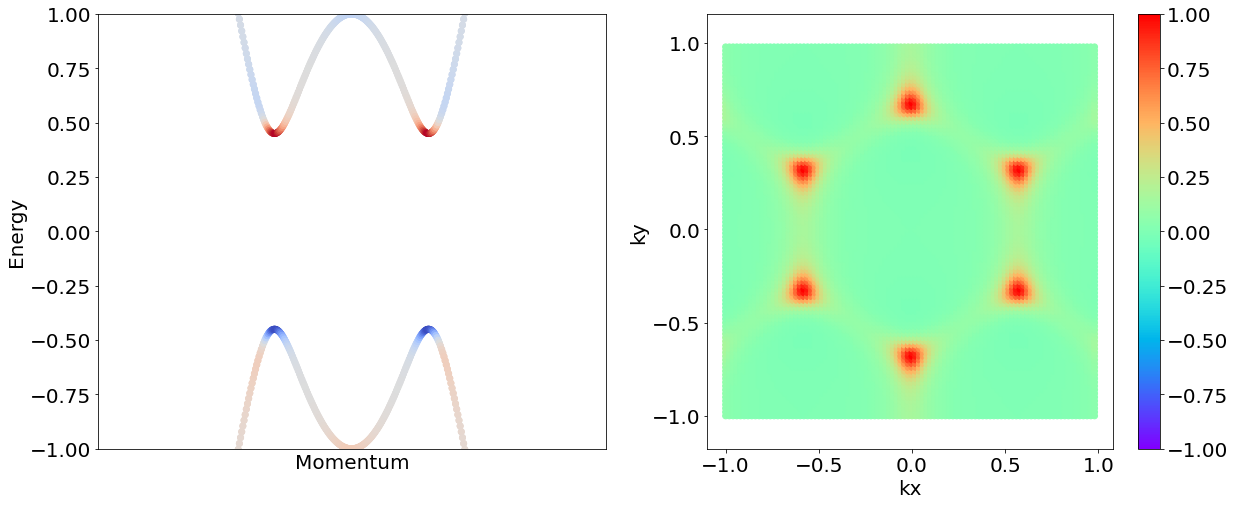

In [8]:
g = geometry.honeycomb_lattice() # honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_haldane(0.1) # add Haldane coupling (second neighbor imaginary hopping)

# let us first compute the band structure, highlighting the Berry curvature
plt.subplot(1,2,1)
(k,e,c) = h.get_bands(operator="Berry") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) # plot

# and now lets compute the berry curvature in reciprocal space for the occupied bands
plt.subplot(1,2,2)
(kx,ky,be) = h.get_berry_curvature() # compute band structure
plt.scatter(kx,ky,c=be/np.max(np.abs(be)),vmin=-1,vmax=1,cmap="rainbow") # plot the Berry curvature in 2D
plt.xlabel("kx") ; plt.ylabel("ky") ; plt.axis("equal") ; plt.colorbar() # adjust plot

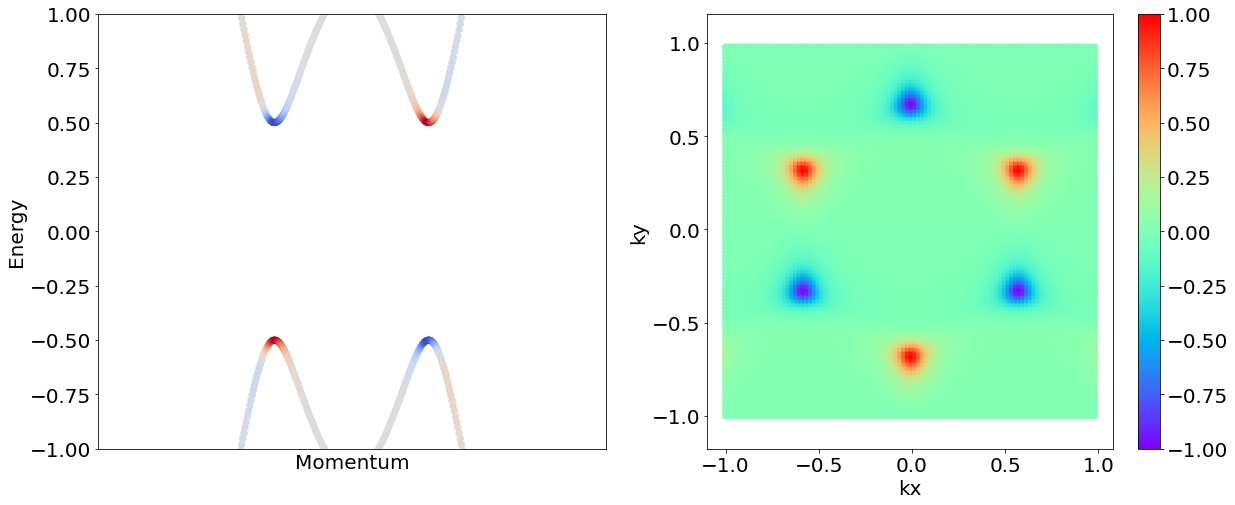

In [9]:
# Now let us do the same, but with a sublattice imbalance
g = geometry.honeycomb_lattice() # honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_sublattice_imbalance(0.5) # add sublattice imbalance (trivial gap)

# let us first compute the band structure, highlighting the Berry curvature
plt.subplot(1,2,1)
(k,e,c) = h.get_bands(operator="Berry") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) # plot

# and now lets compute the berry curvature in reciprocal space for the occupied bands
plt.subplot(1,2,2)
(kx,ky,be) = h.get_berry_curvature() # compute band structure
plt.scatter(kx,ky,c=be/np.max(np.abs(be)),vmin=-1,vmax=1,cmap="rainbow") # plot the Berry curvature in 2D
plt.xlabel("kx") ; plt.ylabel("ky") ; plt.axis("equal") ; plt.colorbar() # adjust plot

### Exercise
- If you integrate the Berry curvature for the case of Haldane coupling, would you obtain a non-zero value?
- If you integrate the Berry curvature for the case of sublattice imbalance, would you obtain a non-zero value?
- Include simultanously a sublattice imbalance and Haldane coupling. What happens when the gap closes?

## Topological phase transitions in the bulk
Let us now see how a topological phase transition takes place in the bulk, when a trivial gap overcomes a topological gap

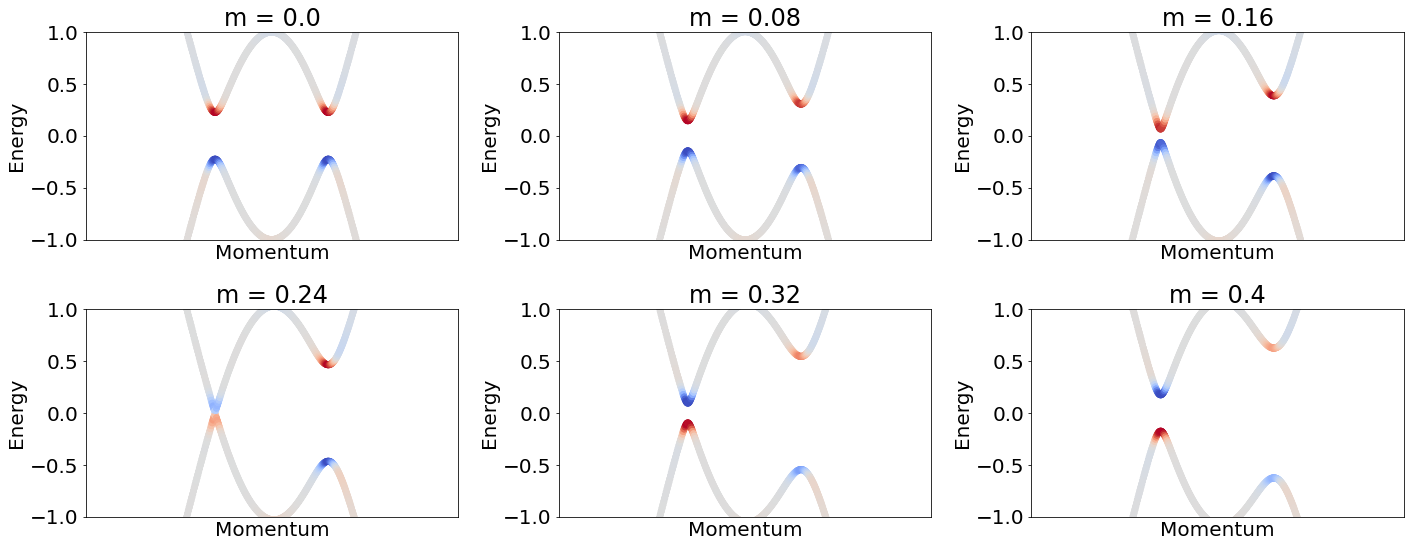

In [19]:
N = 6 # number of plots
ms = np.linspace(0.,0.4,N) # energies

g = geometry.honeycomb_lattice() # honeycomb ribbon with armchair edge, the number controls the width


ii = 1 # counter for the subplots
for m in ms:
    plt.subplot(N//3,3,ii); ii += 1 
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_haldane(0.05) # add Haldane coupling
    h.add_sublattice_imbalance(m) # add a sublattice imbalance
    (k,e,c) = h.get_bands(operator="Berry") # compute band structure
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-1.,1.]) # plot
    plt.title("m = "+str(np.round(m,2))) # set the title
plt.tight_layout() # adjust the subplots

### Exercise
- If you double the strength of the Haldane coupling, at which value of the sublattice imbalance do you have a gap closing?

## Topological phase transitions in the edge
Let us now see how a topological phase transition takes place in the edge, when a trivial gap overcomes a topological gap

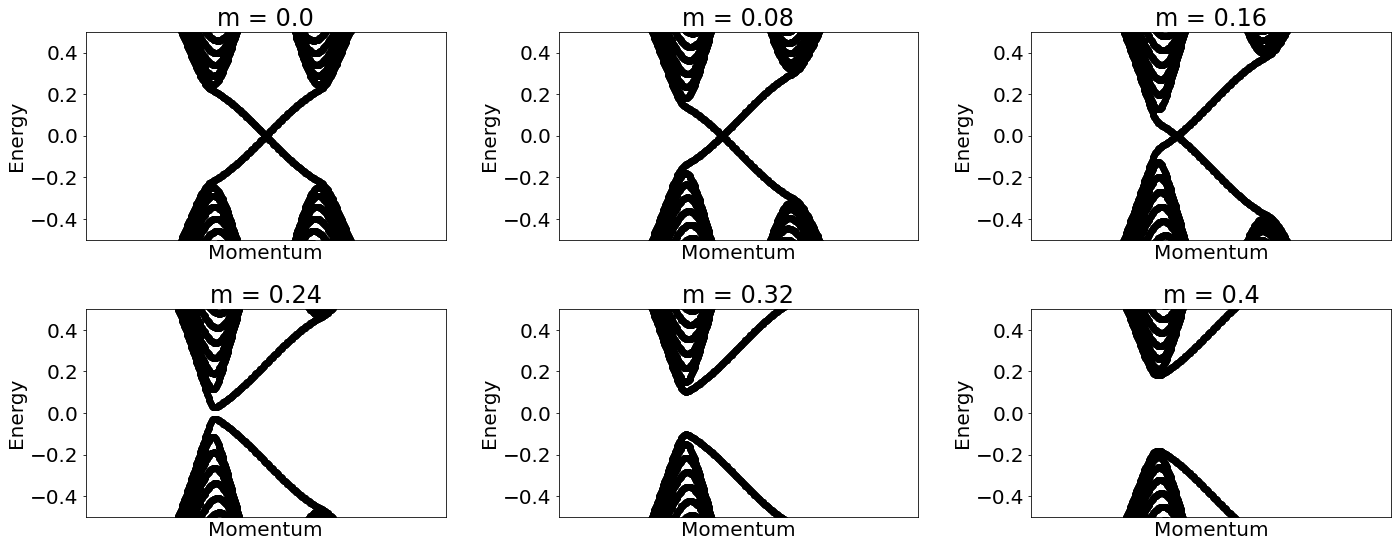

In [11]:
N = 6 # number of plots
ms = np.linspace(0.,0.4,N) # energies

g = geometry.honeycomb_zigzag_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width


ii = 1 # counter for the subplots
for m in ms:
    plt.subplot(N//3,3,ii); ii += 1 
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_haldane(0.05) # add Haldane coupling
    h.add_sublattice_imbalance(m) # add a sublattice imbalance
    (k,e) = h.get_bands() # compute band structure
    plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-.5,.5]) # plot
    plt.title("m = "+str(np.round(m,2))) # set the title
plt.tight_layout() # adjust the subplots

### Exercise
- At which value do the gapless edge states disappear?
- How does this value compare with the value for the bulk gap closing?
- Compute how is this very same phenomenology for an armchair ribbon

## The quantum spin Hall effect
Let us now focus on a different topologicla state of matter, the quantum spin Hall effect. This topological state is driven by spin-orbit coupling and features edge states that are robust to perturbations that do not break time reversal symmetry

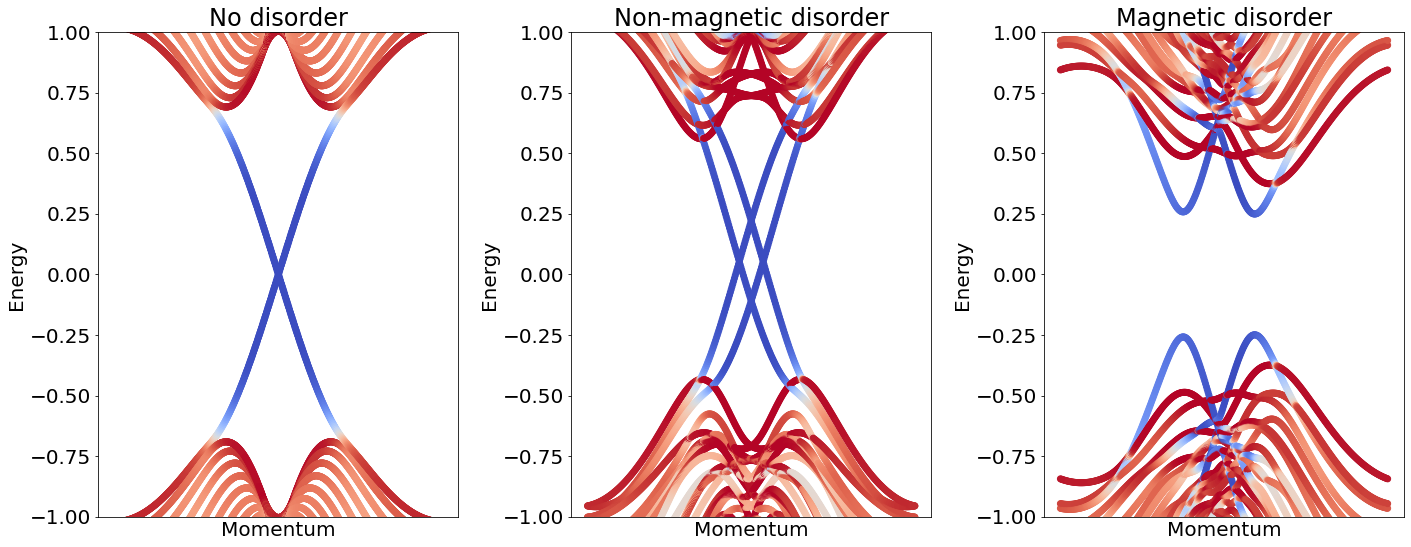

In [12]:
g = geometry.honeycomb_zigzag_ribbon(10) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_soc(0.15) # add intrinsic SOC

# first, let us consider a ribbon without disorder
plt.subplot(1,3,1) ; plt.title("No disorder")
(k,e,c) = h.get_bands(operator="bulk") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])

# now, lets add non-magnetic disorder
plt.subplot(1,3,2) ; plt.title("Non-magnetic disorder")
hd = h.copy() ; hd.add_onsite(lambda r: 1.*(np.random.random()-0.5)) # new Hamiltonian with disorder
(k,e,c) = hd.get_bands(operator="bulk") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])

# now, lets add magnetic disorder
plt.subplot(1,3,3) ; plt.title("Magnetic disorder")
hd = h.copy() ; hd.add_exchange(lambda r: 1.*(np.random.random(3)-0.5)) # new Hamiltonian with disorder
(k,e,c) = hd.get_bands(operator="bulk") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])

plt.tight_layout() # adjust plots

### Exercise
- Take an armchair ribbon and recompute the previous bandstructure. Do you observe the same phenomenology?
- Take a supercell of the system, and repeat the calculations above. Do you observe the same phenomenology?
- Discuss how this can be rationalized in terms of topological invariants

## The valley Hall effect
Let us now address how an electrically controllable topological edge state can appear in graphene multilayers

(-1.0, 1.0)

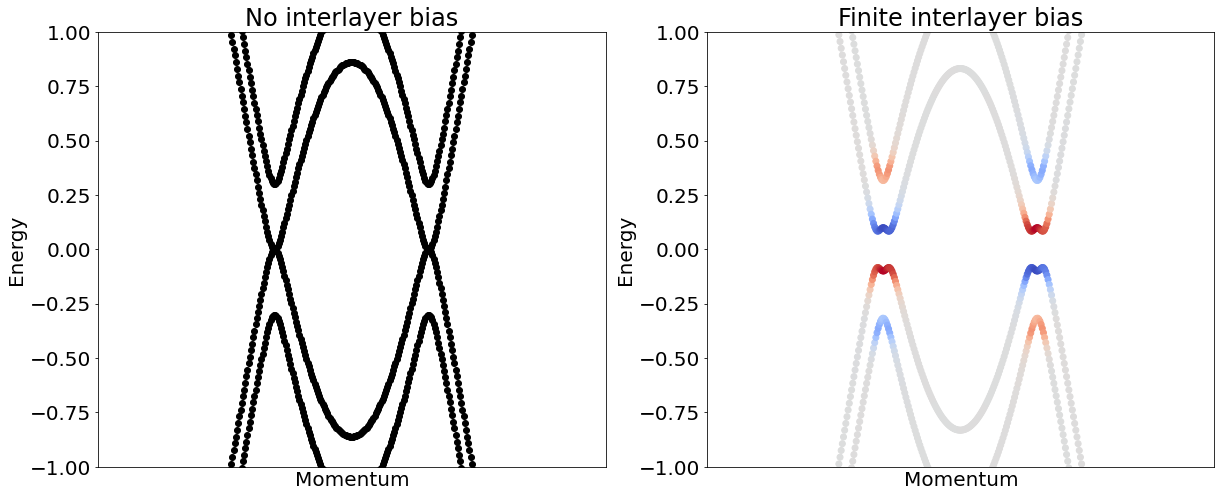

In [20]:
from pyqula import specialhamiltonian # use 
h = specialhamiltonian.multilayer_graphene(l=[0,1],ti=0.3) # Hamiltonian of an AB bilayer 

# first without an interlayer bias
plt.subplot(1,2,1) ; plt.title("No interlayer bias")
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) # plot

# now with an interlayer bias
plt.subplot(1,2,2) ; plt.title("Finite interlayer bias")
h.add_onsite(lambda r: 0.1*np.sign(r[2])) # bias difference between layers
(k,e,c) = h.get_bands(operator="berry") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.]) # plot

### Exercise
- Compute the Berry curvature in the presence of an interlayer bias
- How does the Berry curvature change if you switch the sign of the interlayer bias?

(-0.5, 0.5)

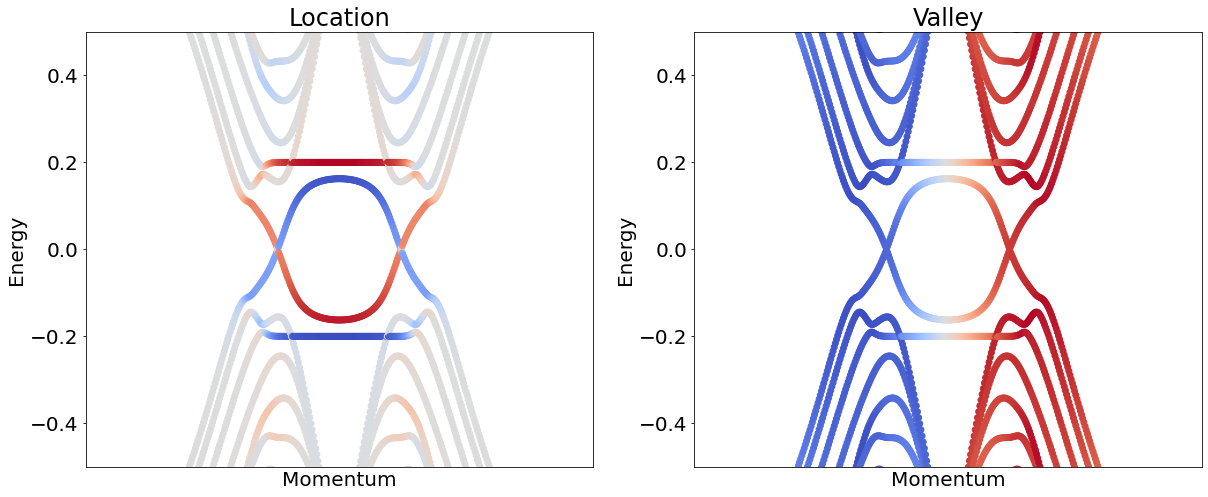

In [14]:
# let us now compute a ribbon of bilayer AB graphene
from pyqula import specialhamiltonian # use 
h = specialhamiltonian.multilayer_graphene(l=[0,1],ti=0.3) # Hamiltonian of an AB bilayer 
h.add_onsite(lambda r: 0.2*np.sign(r[2])) # bias difference between layers
from pyqula import ribbon
h = ribbon.bulk2ribbon(h,n=20) # generate a ribbon from the bulk Hamiltonian

# compute the expectation value of the location
plt.subplot(1,2,1) ; plt.title("Location")
(k,e,c) = h.get_bands(operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])# plot

# compute the expectation value of the valley
plt.subplot(1,2,2) ; plt.title("Valley")
(k,e,c) = h.get_bands(operator="valley") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])# plot

### Exercise
- Discuss what is the direction of the propagation, valley quantum number, and location of each state
- Create a ribbon where in the upper half there is a positive interlayer bias, and in the lower half a negative interlayer bias. How many states do you observe?